[342.75677573]
[250.74476794]
[158.74903728]
[85.30491706]
[70.55060788]
[61.96138573]
[55.14620436]
[49.37282404]
[44.36077412]
[39.95886475]
[36.06829124]
[32.61663672]
[29.54699683]
[26.81268487]
[24.37433204]
[22.19814041]
[20.25474413]
[18.51841724]
[16.96649235]
[15.57891543]
[14.33789269]
[13.22760283]
[12.2339575]
[11.34439832]
[10.54772278]
[9.83393316]
[9.19410457]
[8.62026875]
[8.10531138]
[7.64288098]
[7.22730777]
[6.85353139]
[6.51703622]
[6.21379369]
[5.94021048]
[5.69308229]
[5.46955234]
[5.26707424]
[5.08337878]
[4.91644408]
[4.76446901]
[4.62584933]
[4.49915633]
[4.38311781]
[4.27660101]
[4.17859741]
[4.08820915]
[4.00463686]
[3.92716888]
[3.85517162]
[3.78808093]
[3.72539446]
[3.66666482]
[3.61149354]
[3.55952561]
[3.51044471]
[3.4639689]
[3.41984683]
[3.37785433]
[3.33779144]
[3.2994797]
[3.26275975]
[3.22748928]
[3.19354109]
[3.16080147]
[3.12916866]
[3.09855159]
[3.06886867]
[3.04004675]
[3.01202023]
[2.9847302]
[2.95812372]
[2.9321532]
[2.90677576]
[2.88195278]
[2

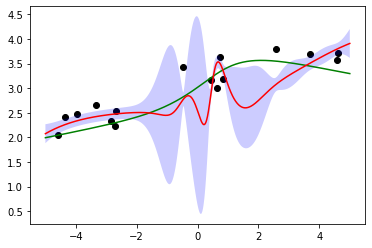

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

fig = plt.figure()
dataAreaMax = 5.0
dataAreaMin = -5.0

trainDataNum = 16
trainSigmaW2 = 1.0
trainSigmaY2 = 0.09
trainHiddenLayerNum = 5

learningSigmaW2 = 4.0
learningSigmaY2 = 0.01
learningHiddenLayerNum = 8
learningAlfa = 0.003
errorMax = 0.8

class NN:
    def __init__(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2

    def setX(self, x):
        self.z0 = np.array([x, 1])
        self.a1 = self.z0.dot(self.wh1.T)
        hiddenTmp = tanh(self.a1)
        self.z1 = np.append(hiddenTmp, 1.0)
        self.a2 = self.wh2.dot(self.z1)
    
    def updateWeight(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2


    def getZ0data(self):
        return self.z0
    
    def getA1data(self):
        return self.a1
    
    def getZ1data(self):
        return self.z1
    
    def getA2data(self):
        return self.a2
    
    def getDA(self):
        dA2 = self.z1
        dA1 = np.outer(self.wh2[0:-1] * (1 - self.z1[0:-1]**2), self.z0)
        return np.concatenate([dA2, np.concatenate(dA1)])

# Create train data
# Select weights
trainWh1 = []
for i in range(trainHiddenLayerNum):
    trainWh1.append(np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = 2))
trainWh1 = np.array(trainWh1)
trainWh2 = np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = trainHiddenLayerNum + 1)
#print(trainWh1)

# Select x data
trainXs = np.random.rand(trainDataNum) * (dataAreaMax - dataAreaMin) + dataAreaMin
#print(trainXs)

# Create y data
trainNN = NN(trainWh1, trainWh2)
trainYs = []
for x in trainXs:
    trainNN.setX(x)
    trainYs.append(trainNN.getA2data() + np.random.normal(loc = 0.0, scale = np.sqrt(trainSigmaY2), size = 1))

# Create a line
originalXs = np.linspace(dataAreaMin, dataAreaMax, 1000)
originalYs = []
for x in originalXs:
    trainNN.setX(x)    
    originalYs.append(trainNN.getA2data())
    
#Learing
#initialize data
learningWh1 = []
for i in range(learningHiddenLayerNum):
    learningWh1.append(np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = 2))
learningWh1 = np.array(learningWh1)
learningWh2 = np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = learningHiddenLayerNum + 1)

learningNN = NN(learningWh1, learningWh2)

# back propagation
while True:
    ew = 0.0
    dEw2 = np.zeros([1, learningHiddenLayerNum + 1])[0]
    dEw1 = np.zeros([learningHiddenLayerNum, 2])

    for x, y in zip(trainXs, trainYs):
        learningNN.setX(x)
        delta2 = learningNN.getA2data() - y
        delta1 = delta2 * learningWh2[0:-1] * (1 - learningNN.getZ1data()[0:-1]**2)
        dEw2 += delta2 * learningNN.getZ1data()
        dEw1 += np.outer(delta1, learningNN.getZ0data())
        ew += 0.5 * delta2**2
        #print(" ", delta1)
        
    print(ew)
#    print(dEw1)
#    print(dEw2)
#    print(learningWh1)
#    print(learningWh2)    
#    print(" ")
    
    if ew < errorMax:
        break
    
    # update weights
    # These equations are almost the same with those of NN with regularization
    learningWh1 = (1 - learningAlfa / learningSigmaW2)*learningWh1 - learningAlfa / learningSigmaW2 * dEw1
    learningWh2 = (1 - learningAlfa / learningSigmaW2)*learningWh2 - learningAlfa / learningSigmaW2 * dEw2
    learningNN.updateWeight(learningWh1, learningWh2)

# For debug
#    break

# Calculate Hessian
lambdaWMap = (1 / learningSigmaW2) * np.eye(learningHiddenLayerNum + 1 + learningHiddenLayerNum * 2)
for x in trainXs:
    learningNN.setX(x)
    dA = learningNN.getDA()
    lambdaWMap += (1/learningSigmaY2) * np.outer(dA, dA)
    
# Create estimated data
upperPredictedYs = []
lowerPredictedYs = []
mapYs = []
lambdaInv = np.linalg.inv(lambdaWMap)

calValNN = NN(learningWh1, learningWh2)
for x in originalXs:
    calValNN.setX(x)
    # Calculate g
    g = calValNN.getDA()
    
    sigmaX = np.sqrt(learningSigmaY2 + g.dot(lambdaInv.dot(g)))

    upperPredictedYs.append(calValNN.getA2data() + sigmaX)
    lowerPredictedYs.append(calValNN.getA2data() - sigmaX)
    mapYs.append(calValNN.getA2data())
    
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainXs, trainYs, color = "black")
plt.plot(originalXs, originalYs, color = "green")
plt.plot(originalXs, mapYs, color = "red")
ax.fill_between(originalXs, upperPredictedYs, lowerPredictedYs, facecolor='blue', alpha=0.2)

plt.show()